# Exploratory Data Analysis
> In this notebook, I will perform an exploratory data analysis on the dataset. I will try to understand the data and its distribution. I will also try to find some insights from the data to see if there are any patterns or trends that I can exploit in the future.

*Author: Pablo Olivares Martínez*

*Date: 2024-04-01*

Let's start by setting up the stage. For this, I will prepare the notebook to read the modules of the project and the data.

In [9]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
import numpy as np
import pandas as pd
from torchvision import transforms
import matplotlib.pyplot as plt
import seaborn as sns
from dataloaders.car_dataset import CarDataset

## Introduction

In this notebook, I will analyze the dataset and gain insights into its structure and characteristics. I will explore various aspects of the data, such as its distribution, relationships between variables, and any patterns or trends that may exist.

This *Car Dataset* consists in fact of three datasets which come from the same source. All the images consists of front view of the cars and eticheted with the car brand, model and year. The datasets are:

- `BD-461`: Contains images of cars classified by brand, model and year. It is split into two folders: `train` and `test`. Inside them, there is a subdirectory specific for each brand, model and year.
- `DB_Marca`: Contains images of cars classified by brand. The instances are stored in directories named after the brand.
- `DB_Marca_Modelo`: Contains images of cars classified by brand and model. The instances are stored in directories named after the brand and model.

As they all come from the same source, they are just different views of the same dataset. Even though the datasets have different number of instances, the `BD-461` dataset is the most complete one, as it contains the most information about the cars. So I will focus on this dataset for the analysis.

## Data Overview

The first step is to load the data and examine its contents. It is crucial to verify that the data has been loaded correctly and that it is in the expected format. We will then proceed to explore the data further and gain a better understanding of its properties. Despite the fact that this initial comprobation will be done to the three datasets, the main focus will be on the `BD-461` dataset as it is the most complete one.

In [11]:
bd_461_dir = "../data/processed/BD-461"
db_marca_dir = "../data/processed/DB_Marca"
db_marca_modelo_dir = "../data/processed/DB_Marca_Modelo"

bd_461 = CarDataset(bd_461_dir)
db_marca = CarDataset(db_marca_dir)
db_marca_modelo = CarDataset(db_marca_modelo_dir)

To verify everything is working correctly, I will start displaying some information about the dataset. The information will include the number of classes, the number of images and their respective class.

In [12]:
print("Dataset: BD-461")
print("Classes: ", bd_461.get_classes())
print("Number of classes: ", len(bd_461.get_classes()))
print("Number of images: ", len(bd_461))

print("\nDataset: DB_Marca")
print("Classes: ", db_marca.get_classes())
print("Number of classes: ", len(db_marca.get_classes()))
print("Number of images: ", len(db_marca))

print("\nDataset: DB_Marca_Modelo")
print("Classes: ", db_marca_modelo.get_classes())
print("Number of classes: ", len(db_marca_modelo.get_classes()))
print("Number of images: ", len(db_marca_modelo))

Dataset: BD-461
Classes:  ['Volkswagen_Jetta_2014-2018', 'Citroen_C3_2005-2009', 'Opel_Astra_2004-2007', 'Renault_Clio_2016-2019', 'Ford_MondeoSedan_2015-Present', 'Fiat_Panda_2011-Present', 'Volkswagen_Golf_2008-2012', 'Ford_Focus_2004-2008', 'Ford_S-Max_2006-2014', 'Lexus_RX_2016-2019', 'Volkswagen_GolfIV5Doors_1997-2003', 'Renault_Twingo_2011-2014', 'Renault_Clio_2009-2012', 'Kia_Picanto_2004-2007', 'Volkswagen_Polo_2014-2017', 'Mercedes_C_2004-2007', 'Fiat_Ulysse_2002-2007', 'Suzuki_Swift_2010-2014', 'Kia_Rio_2011-2016', 'Volkswagen_Touareg_2007-2010', 'Honda_Civic5Doors_2008-2012', 'Opel_Corsa_2006-2010', 'Mazda_6_2005-2007', 'Citroen_C4Picasso_2013-2016', 'Toyota_Hilux_2015-2018', 'Jeep_Cheroke_2013-2018', 'Renault_Megane_2015-Present', 'Fiat_GrandePunto_2005-2009', 'Mercedes_A_2008-2012', 'Hyundai_I20_2018-2020', 'Audi_Q3_2018-Present', 'Kia_Sportage_2008-2010', 'Peugeot_Partner_2019-Present', 'Honda_Civic5Doors_2016-2019', 'Renault_Clio_2001-2006', 'Peugeot_3008_2013-2016', 'Se

Now let's see some images from the dataset with their respective labels. To do that, I will define an auxiliary function that will help me to display the images.

In [13]:
def show_sample_images(dataset, num_samples=5, transform=None):
    """Display sample images from the dataset."""
    sample_indices = np.random.choice(len(dataset), num_samples, replace=False)
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(sample_indices, start=1):
        image, label = dataset[idx]
        if transform:
            image = transform(image)
            image = image.permute(1, 2, 0)  # Reorder dimensions for matplotlib
        ax = plt.subplot(1, num_samples, i)
        ax.imshow(image)
        ax.set_title(dataset.idx_to_class[label])
        ax.axis('off')
    plt.show()

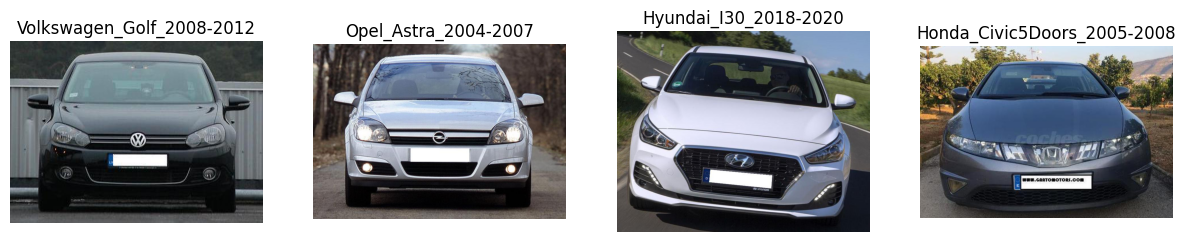

In [14]:
show_sample_images(bd_461, num_samples=4)

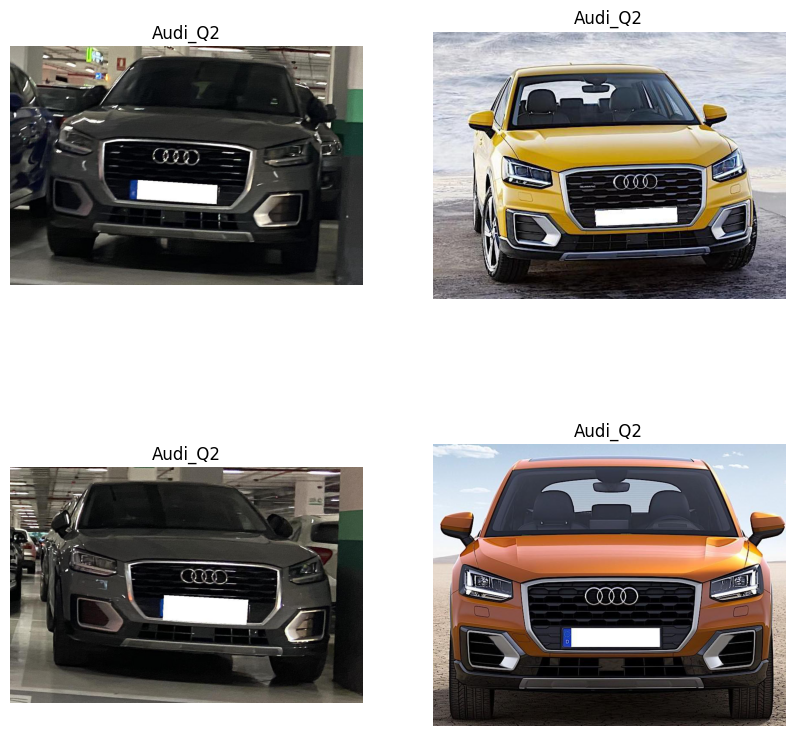

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    image, label = db_marca_modelo[i]
    ax = axs[i // 2, i % 2]
    ax.imshow(image)
    ax.set_title(db_marca_modelo.idx_to_class[label])
    ax.axis('off')

plt.show()

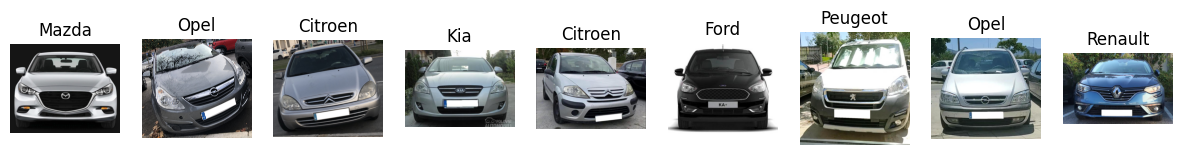

In [16]:
show_sample_images(db_marca, num_samples=9)

As we can see, the datasets read correctly and the images are displayed correctly. As we can see, images are not previously shuffled, so we can see that the first images are from the same class. This is important to take into account when splitting the dataset into training and testing sets.

We can also look at some technical information about the images, such as their size and the number of channels. This information will be useful when preprocessing the images for training the model.

In [17]:
for idx in range(5):
    image, _ = bd_461[idx]
    image = np.array(image)
    print("Shape of the image: ", image.shape)
    print("Channel of the image: ", image.shape[-1])

for idx in range(len(bd_461)):
    image, label = bd_461[idx]
    image = np.array(image)

    if image.shape[-1] != 3:
        print("Image witohut 3 channels: ", label)
        break

Shape of the image:  (478, 672, 3)
Channel of the image:  3
Shape of the image:  (534, 711, 3)
Channel of the image:  3
Shape of the image:  (2177, 2711, 3)
Channel of the image:  3
Shape of the image:  (891, 1339, 3)
Channel of the image:  3
Shape of the image:  (445, 682, 3)
Channel of the image:  3


Now is clear that the images have different sizes and have 3 channels. This will imply that a transformation will be needed to resize the images to a different (probably smaller) size to make the training process more efficient and homogeneous. Moreover, I am going to work with models pretrained on ImageNet, so the images will need to be resized to 224x224 pixels.

## Data Exploration

I will start by examining the distribution of the classes and dimensions in the dataset. This will help me to understand the balance of the dataset and identify any potential issues that may arise during training.

In [18]:
def visualize_class_distribution(dataset):
    """Visualize the distribution of classes in the dataset."""
    class_counts = {class_name: 0 for class_name in dataset.idx_to_class.values()}
    for label in dataset.labels:
        class_name = dataset.idx_to_class[label]
        class_counts[class_name] += 1
        
    class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
    class_counts_df = class_counts_df.sort_values('Count', ascending=False)

    plt.figure(figsize=(10, max(6, len(class_counts) / 4)))
    sns.barplot(x='Count', y='Class', data=class_counts_df, palette='viridis')
    
    plt.title("Class Distribution")
    plt.xlabel("Number of Images")
    plt.ylabel("Class")
    plt.tight_layout()
    plt.show()

def visualize_image_dimensions(dataset):
    """Visualize the distribution of image dimensions."""
    widths, heights = [], []
    
    for i in range(len(dataset)):
        image, _ = dataset[i]
        width, height = image.size
        widths.append(width)
        heights.append(height)

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(widths, bins=20, kde=True, color='skyblue', edgecolor='none')
    plt.title('Width Distribution')
    
    plt.subplot(1, 2, 2)
    sns.histplot(heights, bins=20, kde=True, color='lightgreen', edgecolor='none')
    plt.title('Height Distribution')
    
    plt.suptitle('Image Dimension Distribution')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


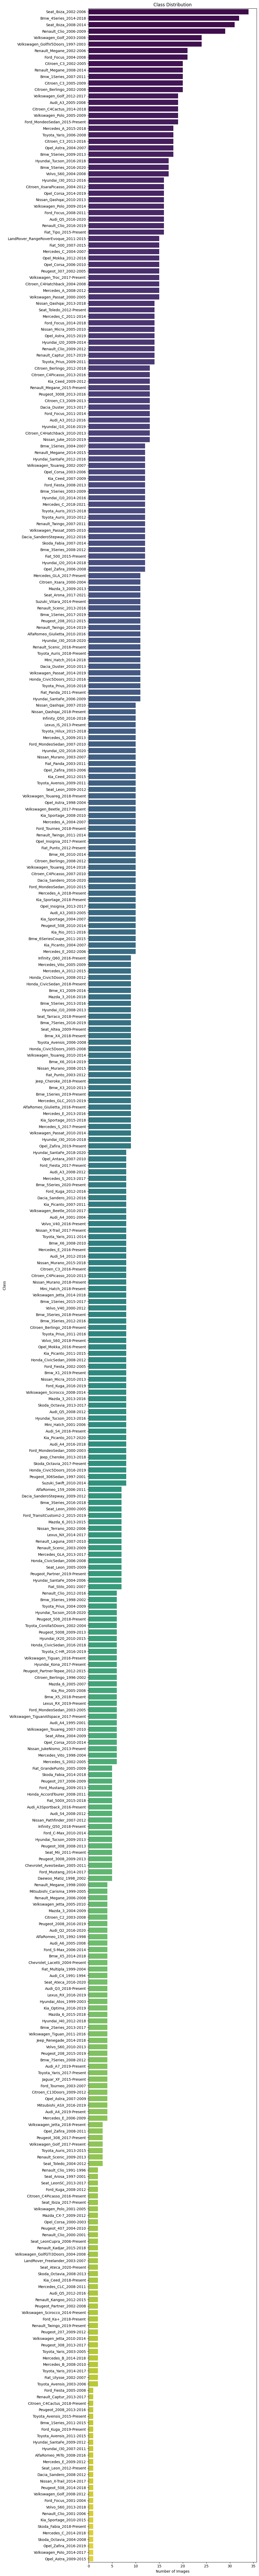

In [19]:
visualize_class_distribution(bd_461)

Class distribution seems to be quite imbalanced, with some classes having a lot more instances than others. We can see that there are even somre classes which only have 1 or 2 images. This is something to take into account when training the model, as it may affect the performance of the model. We may need to use techniques such as data augmentation or class weighting to address this issue.

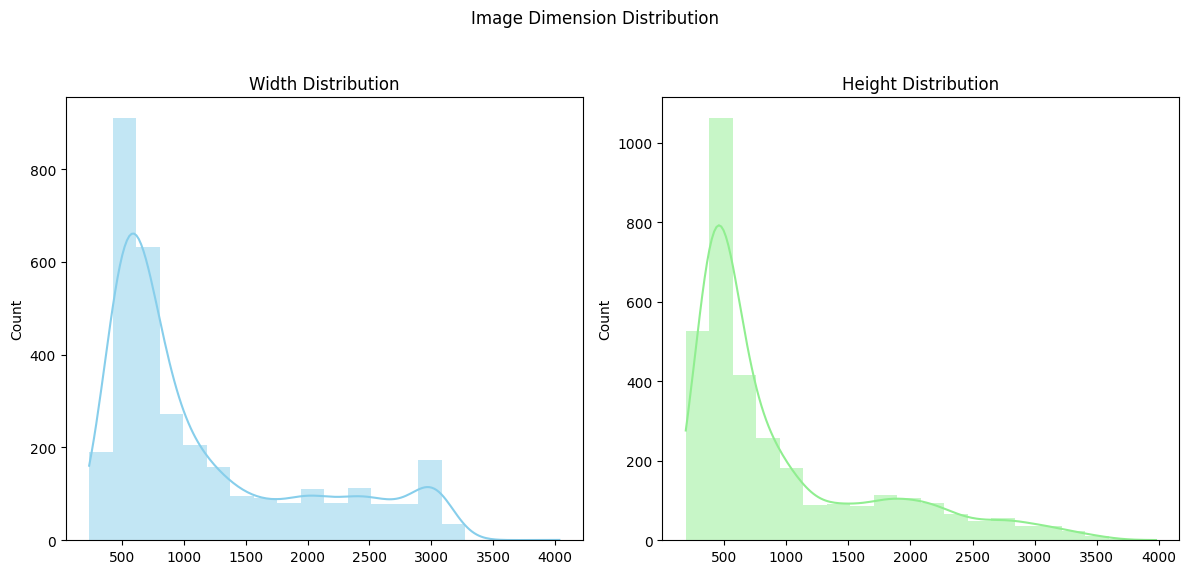

In [20]:
visualize_image_dimensions(bd_461)

Despite the fact that the distribution of weight and height seems to be imbalanced too, both distributions are quite similar. This tell us that images have a similar aspect ratio, which is good for training the model. However, we can see that images around 600x600 pixels are the most common ones. When training the model, we will need to resize the images to a smaller size to make the training process more efficient. Also, I will have to do some data preprocessing, such as normalization and data augmentation, to improve the performance of the model as a consequence of the imbalanced dimensions of the images. I will have to consider synthetic data generation to balance the dataset.

Let's see the other datasets to see if they have the same characteristics.

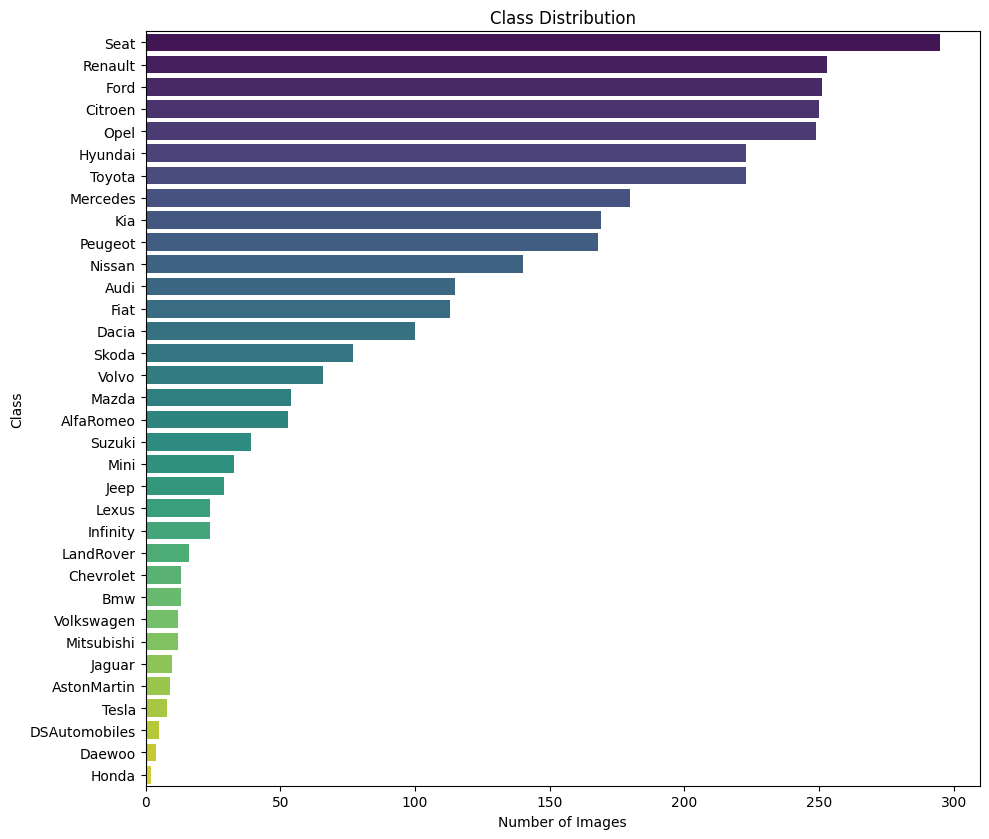

In [ ]:
visualize_class_distribution(db_marca)

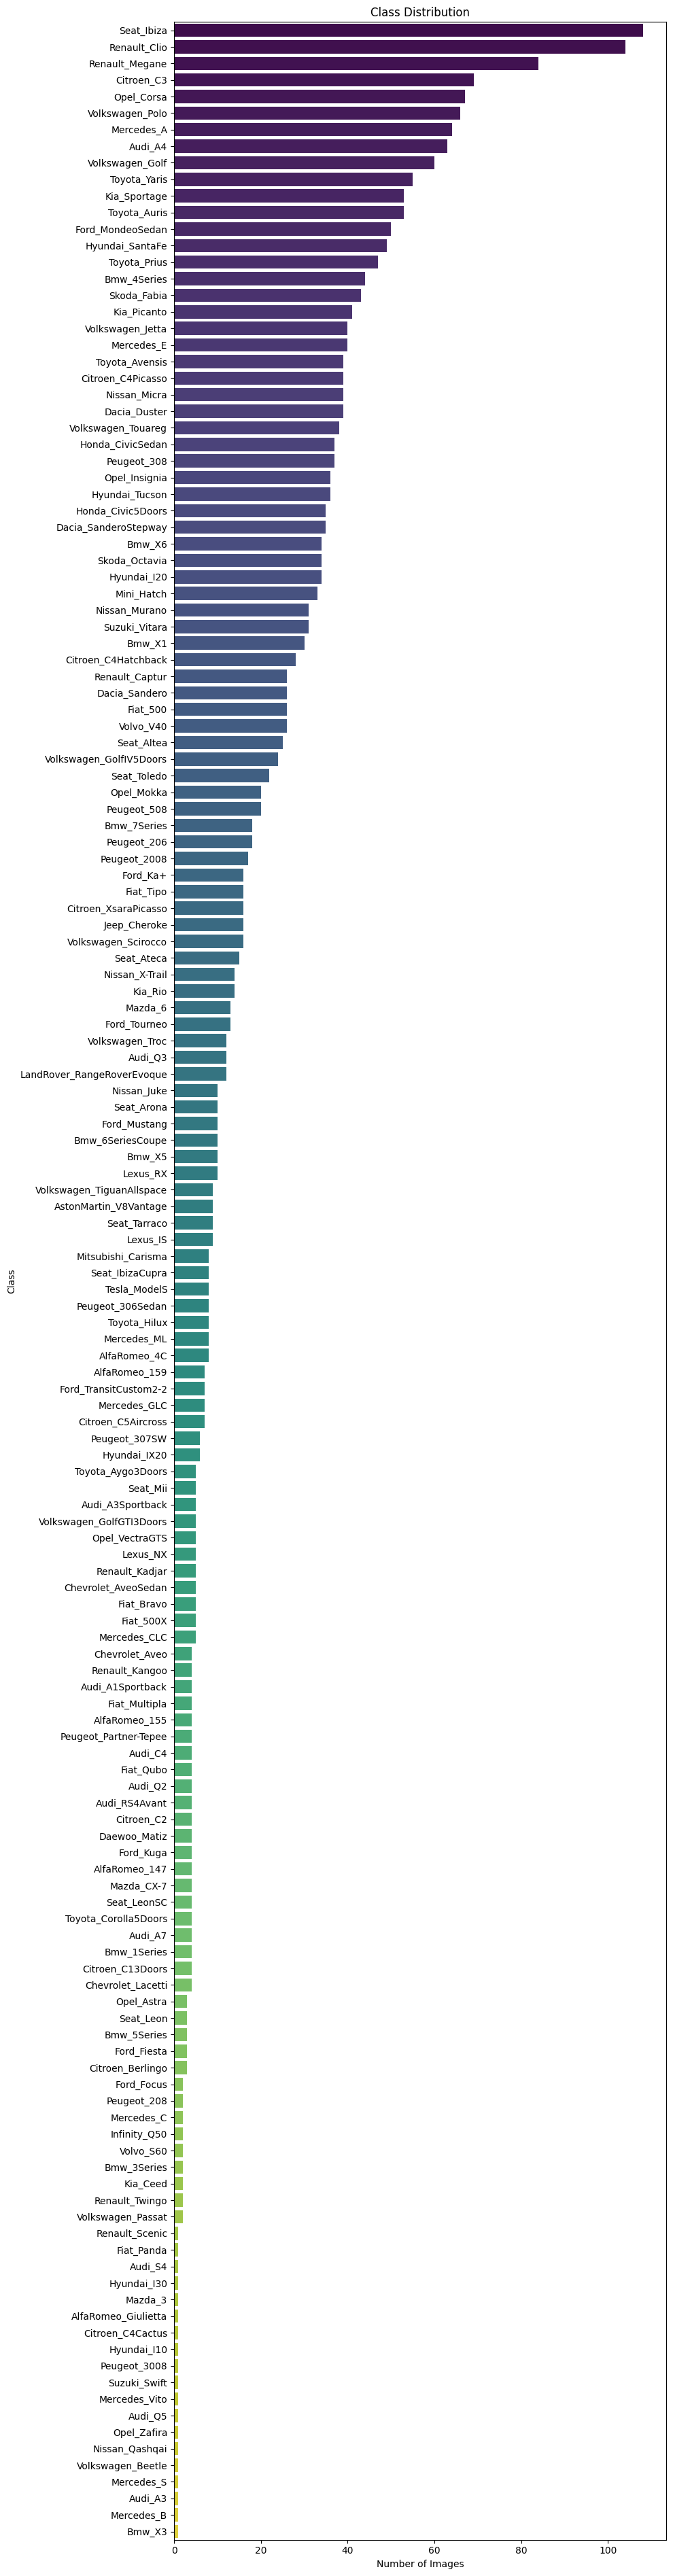

In [ ]:
visualize_class_distribution(db_marca_modelo)

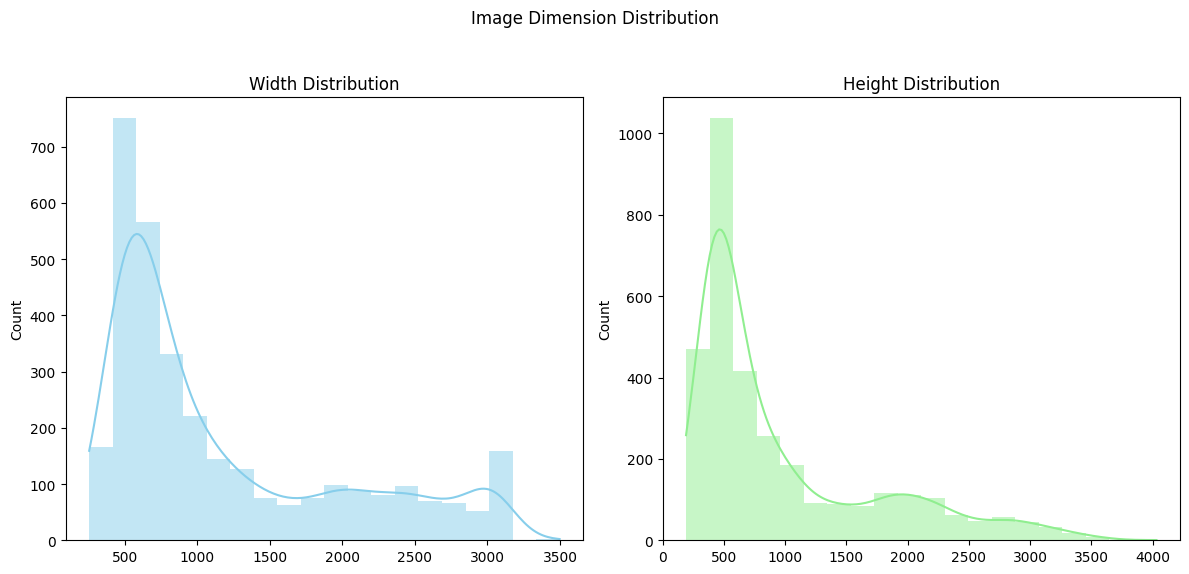

In [ ]:
visualize_image_dimensions(db_marca)

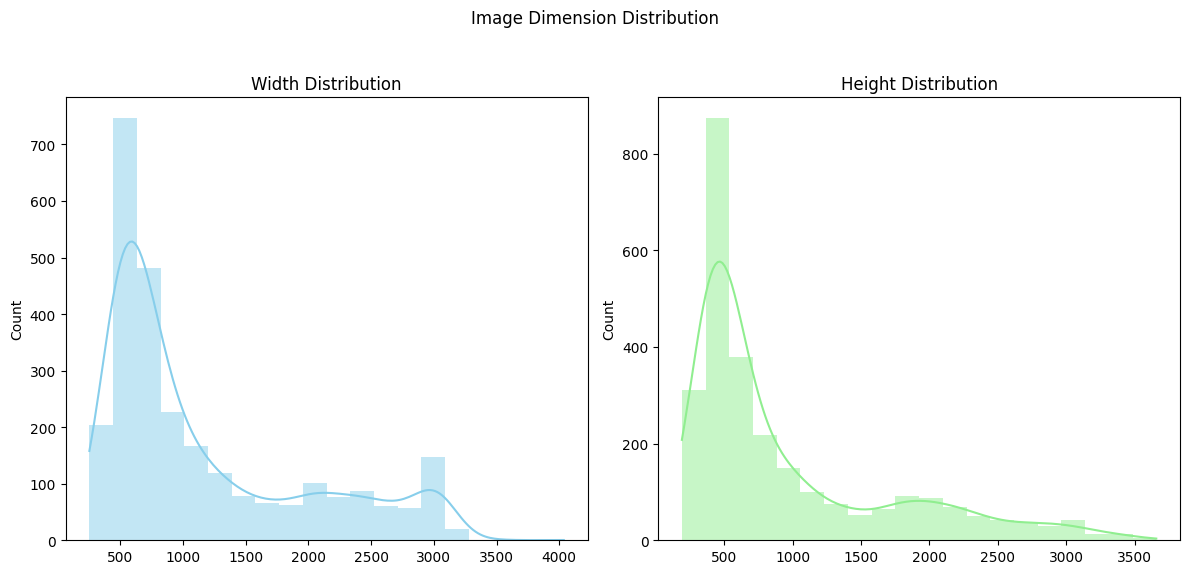

In [ ]:
visualize_image_dimensions(db_marca_modelo)

Again, we can see quite similar distributions in the `DB_Marca` and `DB_Marca_Modelo` datasets. The main difference is that the `DB_Marca` dataset has a lot more instances per class than the other two datasets because it agroupates the images from the previous dataset in many less classes. This similarity between the datasets is expected, as they all come from the same source and are just different views of the same dataset, probably with some extra instances, but essentially the same data.

I want now to see if there is any correlation between the dimensions of the images and the number of instances in the dataset. To do this, I will plot a box plot of the dimensions of the images against the number of instances in the dataset. In this case, I will only use the brands' dataset, as it has less classes and it is easier to visualize. In case I find something interesting, I will later focus on that specific case with the other datasets.

In [50]:
def collect_image_sizes_and_labels(dataset):
    """Collect image sizes (area) and their corresponding labels from the dataset."""
    data = {'Label': [], 'Size': []}

    for i in range(len(dataset)):
        image, label = dataset[i]
        width, height = image.size
        area = width * height

        data['Label'].append(dataset.idx_to_class[label])
        data['Size'].append(area)
    
    return pd.DataFrame(data)

def visualize_image_size_distribution(data_df):
    """Visualize the distribution of image sizes across classes using a sorted boxplot."""
    plt.figure(figsize=(12, 6))
    sorted_labels = data_df.groupby('Label')['Size'].median().sort_values().index
    sns.boxplot(x='Label', y='Size', data=data_df, order=sorted_labels, palette='viridis')
    plt.title('Image Size Distribution')
    plt.xlabel('Class')
    plt.ylabel('Image Size (Area)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

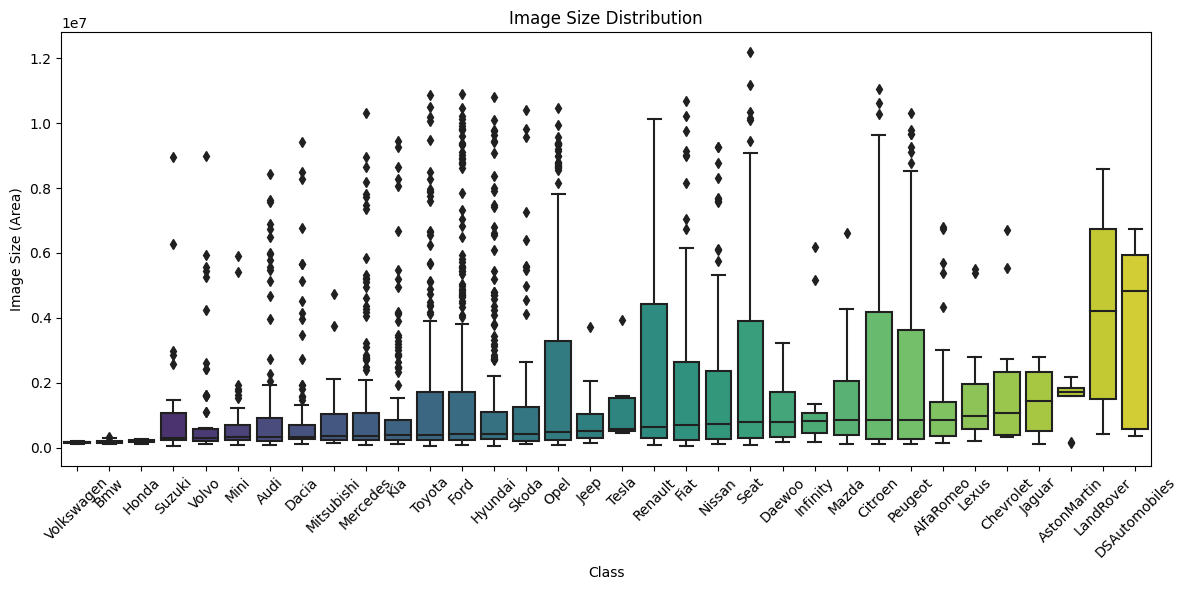

In [51]:
db_marca_sizes = collect_image_sizes_and_labels(db_marca)
visualize_image_size_distribution(db_marca_sizes)

The boxplot illustrates a huge variation in the image size distribution among car classes, with some classes, such as Chevrolet and Aston Martin, showing a considerable spread in image sizes, denoted by the length of their boxes and the presence of outliers. These outliers signify images that deviate markedly from the median size, potentially indicating labeling inconsistencies or data processing discrepancies. In contrast, classes like Volkswagen, BMW, and Honda exhibit a narrow interquartile range, suggesting a higher degree of size uniformity within these classes. The median image size, indicated by the central mark in each box, varies across classes, implying that certain brands consistently have larger or smaller images. Given these statistical variances, particularly the extreme values observed for classes with a broad range of sizes, it's crucial to conduct a detailed review of the dataset to ensure accurate labeling and consistent preprocessing.

## Conclusion

Concluding this notebook, the exploratory data analysis has given us a clear snapshot of the car image dataset. The class distribution was our starting point, shedding light on which car brands were over- or under-represented—a cue for us to possibly even out the data before training models. We also measured the image sizes and noticed quite a range; some brands like Chevrolet showed a high degree of variation, with many images being much larger or smaller than the norm, hinting at potential labeling errors or image corruption.

Our statistical deep dive, captured in the boxplots, emphasized these size discrepancies and helped us pinpoint the median sizes for each brand. This analysis is crucial because it tells us that we might need to resize images so that they're more uniform, making it easier for a machine learning model to learn from them.

In essence, the EDA has armed us with valuable insights that will direct how we preprocess the images next, ensuring our data is clean and primed for developing reliable and accurate machine learning models. This notebook is the map that will navigate us through the next steps of preparing our dataset and training robust models.